
# Project: Investigating tmdb Movies Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The tbdb Movies dataset will be wrangled/manipulated and then analysed to answer the below questions. The data was uploaded from the Udacity project folder. After an initial look over of the data, it will be cleaned and prepared ready to use. 
The questions being attempted include the following :- 

 > Are movies getting more expensive in more recent times (ie are budgets increasing steadily or at a faster rate)? 
  Is the movie budget correlated to a bigger earnings? 
  Is the movie budget a factor in the success of the movies popularity?
  
Budget will be the dependent variable. 



In [104]:
# import required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties


In [2]:
# Load movie data and initial data observations. See Below for findings.
df_Mov = pd.read_csv('tmdb-movies.csv')
df_Mov.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df_Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Inital Observations
There are large numbers for the budgets etc and alot of columns. 
Will drop out alot of columns to really clear the data to just what I want so its easy to work with. 
The key columns will be buget, revenue, runtime, genres, votes, release_year, budget adj and revenue_adj. 
Will need to create a new column that contains a final budget number (adds the budget with budget adjust and revenue with revenue adjust). This will give a true representation of the figures. 

Some columns are missing data....some of these such as homepage and director may not matter as they are not needed for the questions I am wanting to answer and expecting to drop these columns during the above step. Other columns such as genres may be needed, so will look at dropping these movies (only a small number effected)


## Cleaning Steps 

Most obvious change needed is the data types to be the same for the budget / adjusted budget. This needs to be done before we can add in a new column with a final budget number. 


To make the data easier to work with and focused, drop the columns that are not required.

In [3]:
import pandas as pd
df_Mov = pd.read_csv('tmdb-movies.csv')
df_Mov.drop(['cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'imdb_id'], axis = 1, inplace=True)

In [6]:
df_Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


Once the irrelevent columns are dropped, need to fix the budget column data types so they are all the same (ie integers). 

Convert the floats to int for the 2 columns (budget_adj, revenue_adj)


In [19]:
df_Mov['budget_adj'] = df_Mov['budget_adj'].astype(int)
df_Mov['revenue_adj'] = df_Mov['revenue_adj'].astype(int)
df_Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null int64
revenue_adj       10866 non-null int64
total_budget      10866 non-null int64
total_revenue     10866 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ MB


Create New columns to show a final revenue and budget figure

In [27]:
df_Mov["total_budget"] = (df_Mov["budget"] + df_Mov["budget_adj"])
df_Mov["total_revenue"] = (df_Mov["revenue"] + df_Mov["revenue_adj"])
df_Mov['total_revenue'] = df_Mov['total_revenue'].astype(int)
df_Mov.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,total_budget,total_revenue
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,287999939,2905974702
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,287999939,726597646
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,211199955,566857226
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129,383999919,3970901354
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923,1385748801,364799923,2891998161


Question 1 - Preperation code is included below prior to answering question. Firstly the data is re-arranged to show the new total_budget calculation as well as the total revenue per year.  

In [35]:
counts = df_Mov.groupby('release_year').count()
tix = df_Mov.groupby(['release_year']).sum()
tix2 = tix.groupby(['release_year', 'total_revenue']).mean()
tix2['total_revenue'] = tix['total_revenue'].apply(int)
tix2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56 entries, (1960, 1214122142) to (2015, 51383894056)
Data columns (total 11 columns):
id               56 non-null int64
popularity       56 non-null float64
budget           56 non-null int64
revenue          56 non-null int64
runtime          56 non-null int64
vote_count       56 non-null int64
vote_average     56 non-null float64
budget_adj       56 non-null int64
revenue_adj      56 non-null int64
total_budget     56 non-null int64
total_revenue    0 non-null float64
dtypes: float64(3), int64(8)
memory usage: 6.0 KB


In [41]:
df_Mov.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,total_budget,total_revenue
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,287999939,2905974702
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,287999939,726597646
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,211199955,566857226
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129,383999919,3970901354
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923,1385748801,364799923,2891998161


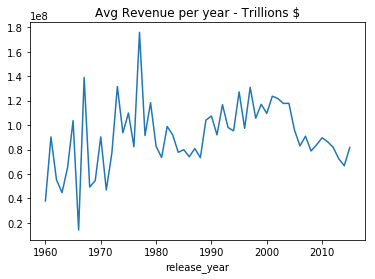

In [39]:
df_Mov.total_revenue.mean()
df_Mov.groupby('release_year')['total_revenue'].mean().plot(kind='line', title="Avg Revenue per year - Trillions $")

Text(0,0.5,'Budget - Trillions $')

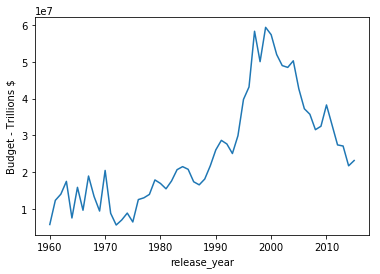

In [38]:
df_Mov.total_budget.mean()
df_Mov.groupby('release_year')['total_budget'].mean().plot(kind='line')
plt.ylabel('Budget - Trillions $')

<a id='eda'></a>
## Extracting answers from the Movie Data

__QUESTION 1:__ Are movies becoming more expensive to make over time and is this increase gradual like a CPI increase or is it exponential. 
__QUESTION 2:__ Does a high budget usually lead to increased popularity?
__QUESTION 3:__ Does a high budget usually correlate to higher box office earnings. 

### 1.Are movies becoming more expensive to make over time (and is the rise gradual or exponential? )
     To answer this question we will look at budget data per year. The data has been manipulted to have uniform data types (integars). New columns were created to bring in the actual budget and the adjusted budget figures to create a final budget number. 
     From the graph below, we can see that the average budgets increased approx 5x from the year 1975 to 1999. They have since fallen back considerably from 2000 to 2015 where the data ends, the budget is closer to 2.2x that of 1975. 

Text(0,0.5,'Budget - Trillions $')

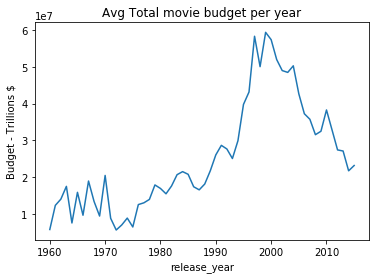

In [9]:
df_Mov.total_budget.mean()
df_Mov.groupby('release_year')['total_budget'].mean().plot(kind='line', title="Avg Total movie budget per year")
plt.ylabel('Budget - Trillions $')

Although we are looking at averages for the years, it would be interesting to see what are the top move budgets for each year. The below code was attempted although issue with titles due to the object data type which needs to be fixed. have included the id to attempt to troublshoot this issue of the movie names code in latter years (encoding issue more than code). We can see the trend rising in the latter years. 

In [57]:
top = df_Mov[["original_title", "budget", "release_year", "id"]].groupby("release_year").max()
top

,original_title,budget,id
release_year,,,
1960,Village of the Damned,12000000,43040
1961,West Side Story,6000000,43020
1962,What Ever Happened to Baby Jane?,15000000,45267
1963,X: The Man with the X-Ray Eyes,31115000,42987
1964,Zulu,17000000,53021
1965,What's New Pussycat?,20000000,42745
1966,Winnie the Pooh and the Honey Tree,18000000,42701
1967,You Only Live Twice,25000000,48784
1968,"Yours, Mine and Ours",12000000,48714


[Below code sourched here](https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe) 


In [66]:
a=lambda x: str(x).split(',')
df_Mov['original_title'].apply(a)
df_Mov['original_title'] = df_Mov['original_title'].astype(str)
df_Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null int64
revenue_adj       10866 non-null int64
total_budget      10866 non-null int64
total_revenue     10866 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ MB


In [63]:
top = df_Mov[["original_title", "budget", "release_year"]].groupby("release_year").max()
budget_list = df_Mov.sort_values(by="total_budget", ascending=False).head()

### 2. Does a high budget result in greater popularity?
To investigate this 2 lists were generated to compare the top 100 values for total_budget - this will let us know if further investigation is needed. 

Text(0,0.5,'Popularity_Votes')

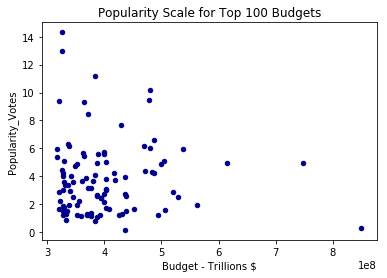

In [121]:
list = df_Mov.nlargest(100,'total_budget')
ax1 = list.plot.scatter(x='total_budget', y='popularity', c='DarkBlue', title="Popularity Scale for Top 100 Budgets")
plt.xlabel('Budget - Trillions $')
plt.ylabel('Popularity_Votes')


In [124]:
list.nlargest(10, 'popularity')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,total_budget,total_revenue
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,121,Action|Science Fiction|Adventure,7/30/14,5612,7.9,2014,156585478,712291130,326585478,1485603529
631,100402,12.971027,170000000,714766572,Captain America: The Winter Soldier,136,Action|Adventure|Science Fiction,3/20/14,3848,7.6,2014,156585478,658365092,326585478,1373131664
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129,383999919,3970901354
634,122917,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,144,Adventure|Fantasy,12/10/14,3110,7.1,2014,230272762,879752289,480272762,1834872077
1386,19995,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,240886902,2827123750,477886902,5608629597
1919,27205,9.363643,160000000,825500000,Inception,148,Action|Thriller|Science Fiction|Mystery|Adventure,7/14/10,9767,7.9,2010,160000000,825500000,320000000,1651000000
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923,1385748801,364799923,2891998161
2875,155,8.466668,185000000,1001921825,The Dark Knight,152,Drama|Action|Crime|Thriller,7/16/08,8432,8.1,2008,187365527,1014733032,372365527,2016654857
4361,24428,7.637767,220000000,1519557910,The Avengers,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,208943741,1443191435,428943741,2962749345
4363,49026,6.591277,250000000,1081041287,The Dark Knight Rises,165,Action|Crime|Drama|Thriller,7/16/12,6723,7.5,2012,237436070,1026712780,487436070,2107754067


By comparing the above list with below list, we can see that some very popular movies by rank were not included in the top 100 total_budget rank. 

In [123]:
df_Mov.sort_values(by="popularity", ascending=False).nlargest(10, 'popularity')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,total_budget,total_revenue
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,287999939,2905974702
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292,287999939,726597646
629,157336,24.949134,165000000,621752480,Interstellar,169,Adventure|Drama|Science Fiction,11/5/14,6498,8.0,2014,151980023,572690645,316980023,1194443125
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,121,Action|Science Fiction|Adventure,7/30/14,5612,7.9,2014,156585478,712291130,326585478,1485603529
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025,211199955,566857226
631,100402,12.971027,170000000,714766572,Captain America: The Winter Soldier,136,Action|Adventure|Science Fiction,3/20/14,3848,7.6,2014,156585478,658365092,326585478,1373131664
1329,11,12.037933,11000000,775398007,Star Wars,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,39575591,2789712242,50575591,3565110249
632,245891,11.422751,20000000,78739897,John Wick,101,Action|Thriller,10/22/14,2712,7.0,2014,18421821,72526614,38421821,151266511
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129,383999919,3970901354
633,131631,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,123,Science Fiction|Adventure|Thriller,11/18/14,3590,6.6,2014,115136381,692752790,240136381,1444853019


In [ ]:
### 3. How often does a high budget result in higher box office earnings ?


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0